# 문서 유사도 - 코사인 유사도

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

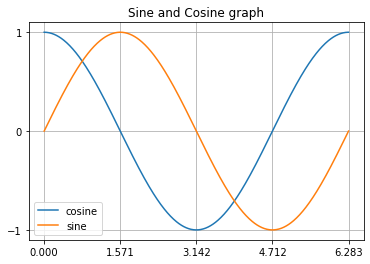

In [3]:
xs = np.linspace(0, 2*np.pi, 500)
cosx = np.cos(xs)
sinx = np.sin(xs)

plt.plot(xs, cosx, label='cosine')
plt.plot(xs, sinx, label='sine')
plt.yticks([-1,0,1])
plt.xticks([0, np.pi/2, np.pi, 1.5*np.pi, 2*np.pi])     # x축은 순서대로, 0도, 90도, 180도, 270도, 360도
plt.grid()
plt.title('Sine and Cosine graph')
plt.legend()
plt.show()

In [6]:
v1, v2, v3 = np.array([1,0]), np.array([0,1]), np.array([-1,0])
v1_norm = np.sqrt(sum(np.square(v1)))
v2_norm = np.sqrt(sum(np.square(v2)))
v3_norm = np.sqrt(sum(np.square(v3)))

In [7]:
# v1, v2는 직각관계
np.dot(v1, v2) / (v1_norm * v2_norm)

0.0

In [8]:
# v1, v3는 180도 차이
np.dot(v1, v3) / (v1_norm * v3_norm)

-1.0

In [9]:
def cos_similarity(v1, v2):
    v1_norm = np.sqrt(sum(np.square(v1)))
    v2_norm = np.sqrt(sum(np.square(v2)))
    return np.dot(v1, v2) / (v1_norm * v2_norm)

In [10]:
cos_similarity(np.array([1,0]), np.array([1,1]))    # 좌표상 (1,0)과 (1,1)의 각도는 45도 => 유사도는 70%가 나온다.

0.7071067811865475

In [12]:
cos_similarity(np.array([1,0]), np.array([2,2]))    # 벡터의 방향이 같기 때문에 코사인 유사도는 (1,1)일 때와 같다.

0.7071067811865475

- 문장의 코사인 유사도

In [13]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()
feature_cv = cvect.fit_transform(doc_list)
feature_cv.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]],
      dtype=int64)

In [18]:
f1 = feature_cv.toarray()[0]
f2 = feature_cv.toarray()[1]
f3 = feature_cv.toarray()[2]

In [19]:
print(f'문장1 vs 문장2: {cos_similarity(f1,f2):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(f1,f3):.4f}')
print(f'문장2 vs 문장3: {cos_similarity(f2,f3):.4f}')

문장1 vs 문장2: 0.6093
문장1 vs 문장3: 0.6396
문장2 vs 문장3: 0.6804


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()
feature_tv = tvect.fit_transform(doc_list)
feature_tv.toarray()

array([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
        0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
        0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
        0.49087711, 0.        , 0.24543856],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
        0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
        0.23402865, 0.39624495, 0.4680573 ],
       [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
        0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
        0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
        0.3660119 , 0.        , 0.3660119 ]])

In [21]:
f1 = feature_tv.toarray()[0]
f2 = feature_tv.toarray()[1]
f3 = feature_tv.toarray()[2]
print(f'문장1 vs 문장2: {cos_similarity(f1,f2):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(f1,f3):.4f}')
print(f'문장2 vs 문장3: {cos_similarity(f2,f3):.4f}')

문장1 vs 문장2: 0.4021
문장1 vs 문장3: 0.4043
문장2 vs 문장3: 0.4565


- Scikit-Learn의 코사인 유사도
    - 영화나 책의 추천 알고리즘에 활용할 수 있다.

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(feature_tv, feature_tv)

array([[1.        , 0.40207758, 0.40425045],
       [0.40207758, 1.        , 0.45647296],
       [0.40425045, 0.45647296, 1.        ]])

### Opinion Review 데이터셋의 문서 유사도

In [23]:
import pandas as pd
import os, glob

In [24]:
filename_list = []
opinion_text = []
for file in glob.glob(os.path.join('OpinosisDataset1.0/topics', '*.data')):        
    with open(file, encoding='latin1') as f:                            
        text = f.read()     
    opinion_text.append(text)
    filename = file.split('\\')[-1].split('.')[0]
    filename_list.append(filename)

df = pd.DataFrame({'filename':filename_list, 'opinion':opinion_text})
df.head(3)

,filename,opinion
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n but for the m..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and ve..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my com...


In [25]:
from nltk import word_tokenize

def simple_tokenizer(text):             
    return [word for word in word_tokenize(text) if len(word) > 2]

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvect = TfidfVectorizer(tokenizer=simple_tokenizer, stop_words='english',
                        ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature = tvect.fit_transform(df.opinion) 

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=2022)
kmeans.fit(feature)
df['cluster_label'] = kmeans.labels_
df['cluster_label'].value_counts()

0    25
1    16
2    10
Name: cluster_label, dtype: int64

In [28]:
# Cluster 1: 호텔
hotel_indices = df[df.cluster_label == 1].index
hotel_indices

Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')